---
title: "Day-9 Pandas & Machine Learning"
categories:
- Python
- Lecture
output:
 html_document:
   keep_md: true
date: '2022-06-29'
---

# Pandas
- Python에서 데이터분석을 위한 대표적인 라이브러리
- 비율 : np < pd

### 기본자료형 

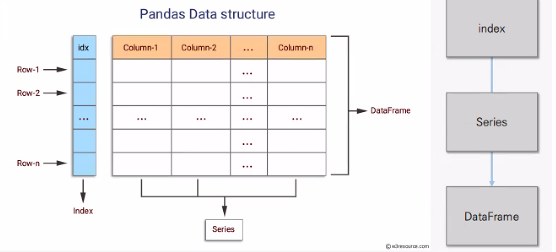
- index : 숫자, 문자열, 데이터프레임이 올수도 있는데 중복값 허용 X
- series : index + 단일 column ( index + column-1)
- DataFrame :  index + 복수 column(index + column-1 + column-2 + …)
  - 데이터프레임.groupby() -> groupby 클래스
  
    - ex) A가 클래스 정의한 메서드 (데이터프레임 info())
    - B가 클래스 정의한 메서드(info()메서드 존재 X)

## 라이브러리 불러오기 

In [91]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.3.5
1.21.6


## 데이터 불러오기 
- 구글 드라이브 내에서 데이터 불러오기 
- datatype : 같은 문자열, 숫자열인데 비트에따라 부피공간이 다르다
  - 비트가 다르면 파생변수생성시 문제가 생길 수 있어서 맞춰줘야 한다.

In [92]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/human_AI/Basic/Chapter 3. pandas/data/Lemonade2016.csv'
lemonade = pd.read_csv(DATA_PATH)
print(type(lemonade)) # series인지 DataFrame인지 확인하기위해
lemonade.info()  
"""
Non_Null Count 열의 숫자가 다르다.
int64 같은 숫자열인데 정확한 데이터 값이 다르다. 
뒤에 비트숫자가 커질수록 부피공간이 커진다.(64 -> 8 = 압축)
info를 보면 결측치를 알 수 있다.
"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         31 non-null     object 
 1   Location     32 non-null     object 
 2   Lemon        32 non-null     int64  
 3   Orange       32 non-null     int64  
 4   Temperature  32 non-null     int64  
 5   Leaflets     31 non-null     float64
 6   Price        32 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


'\nNon_Null Count 열의 숫자가 다르다.\nint64 같은 숫자열인데 정확한 데이터 값이 다르다. \n뒤에 비트숫자가 커질수록 부피공간이 커진다.(64 -> 8 = 압축)\ninfo를 보면 결측치를 알 수 있다.\n'

### 데이터 맛보기

In [93]:
print(lemonade.head()) # 텍스트로 출력, head() : 데이터의 앞에서부터 보여준다
"""
0,1,2,3,4 = index
"""

       Date Location  Lemon  Orange  Temperature  Leaflets  Price
0  7/1/2016     Park     97      67           70      90.0   0.25
1  7/2/2016     Park     98      67           72      90.0   0.25
2  7/3/2016     Park    110      77           71     104.0   0.25
3  7/4/2016    Beach    134      99           76      98.0   0.25
4  7/5/2016    Beach    159     118           78     135.0   0.25


'\n0,1,2,3,4 = index\n'

In [94]:
print(lemonade.tail()) # 데이터의 끝에서부터 보여준다

         Date Location  Lemon  Orange  Temperature  Leaflets  Price
27  7/27/2016     Park    104      68           80      99.0   0.35
28  7/28/2016     Park     96      63           82      90.0   0.35
29  7/29/2016     Park    100      66           81      95.0   0.35
30  7/30/2016    Beach     88      57           82      81.0   0.35
31  7/31/2016    Beach     76      47           82      68.0   0.35


### 기술통계량 보는 함수
  - describe()

In [95]:
print(lemonade.describe()) # std(표준편차), 4분위값, 최대최소값을 볼 수 있다
"""
레몬의 표준편차가 더크다
-> 레몬의 판매량의 격차가 더크다
"""

            Lemon      Orange  Temperature    Leaflets      Price
count   32.000000   32.000000    32.000000   31.000000  32.000000
mean   116.156250   80.000000    78.968750  108.548387   0.354688
std     25.823357   21.863211     4.067847   20.117718   0.113137
min     71.000000   42.000000    70.000000   68.000000   0.250000
25%     98.000000   66.750000    77.000000   90.000000   0.250000
50%    113.500000   76.500000    80.500000  108.000000   0.350000
75%    131.750000   95.000000    82.000000  124.000000   0.500000
max    176.000000  129.000000    84.000000  158.000000   0.500000


'\n레몬의 표준편차가 더크다\n-> 레몬의 판매량의 격차가 더크다\n'

### 범주형 데이터 빈도수 구하기
  - 데이터['범주'].value_counts()
    - series에서 사용

In [96]:
lemonade['Location'].value_counts() # 

Beach    17
Park     15
Name: Location, dtype: int64

In [97]:
lemonade['Price'].value_counts()

0.25    15
0.50    11
0.35     6
Name: Price, dtype: int64

## 행과 열 다루기 
- 사칙연산이 가능하다

- Sold(판매량) 컬럼(=피처=feature) 추가 

In [98]:
lemonade['Sold'] = 0 # Sold라는 피처에 0이라는 데이터를 삽입
print(lemonade.head(3))

       Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sold
0  7/1/2016     Park     97      67           70      90.0   0.25     0
1  7/2/2016     Park     98      67           72      90.0   0.25     0
2  7/3/2016     Park    110      77           71     104.0   0.25     0


In [99]:
lemonade['Sold'] = lemonade['Lemon'] + lemonade['Orange'] #Sold라는 피처에 Lemon+Orange 값 삽입
print(lemonade.head(3))

       Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sold
0  7/1/2016     Park     97      67           70      90.0   0.25   164
1  7/2/2016     Park     98      67           72      90.0   0.25   165
2  7/3/2016     Park    110      77           71     104.0   0.25   187


- Revenue(매출) = 단가 X 판매량 

In [100]:
lemonade['Revenue'] = lemonade['Price'] * lemonade['Sold']
#print(lemonade.head(3))
print(lemonade[['Revenue', 'Price', 'Sold']].head()) # 원하는 피처만 볼때

   Revenue  Price  Sold
0    41.00   0.25   164
1    41.25   0.25   165
2    46.75   0.25   187
3    58.25   0.25   233
4    69.25   0.25   277


- drop()함수 사용해서 열 또는 행 제거 
  - axis = 1 -> 열을 제거
  - axis = 0 -> 행을 제거
    - 리스트로 여러 열과 행을 제거 가능


In [101]:
# 열 제거
col_drop = lemonade.drop('Sold', axis=1)
print(col_drop.head())

       Date Location  Lemon  Orange  Temperature  Leaflets  Price  Revenue
0  7/1/2016     Park     97      67           70      90.0   0.25    41.00
1  7/2/2016     Park     98      67           72      90.0   0.25    41.25
2  7/3/2016     Park    110      77           71     104.0   0.25    46.75
3  7/4/2016    Beach    134      99           76      98.0   0.25    58.25
4  7/5/2016    Beach    159     118           78     135.0   0.25    69.25


In [102]:
# index 제거
# index에 포함 된 모든 값 제거
row_drop = lemonade.drop(2, axis = 0) 
print(row_drop.head())

       Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sold  \
0  7/1/2016     Park     97      67           70      90.0   0.25   164   
1  7/2/2016     Park     98      67           72      90.0   0.25   165   
3  7/4/2016    Beach    134      99           76      98.0   0.25   233   
4  7/5/2016    Beach    159     118           78     135.0   0.25   277   
5  7/6/2016    Beach    103      69           82      90.0   0.25   172   

   Revenue  
0    41.00  
1    41.25  
3    58.25  
4    69.25  
5    43.00  


### 데이터 인덱싱 

In [103]:
print(lemonade[4:7]) 

       Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sold  \
4  7/5/2016    Beach    159     118           78     135.0   0.25   277   
5  7/6/2016    Beach    103      69           82      90.0   0.25   172   
6  7/6/2016    Beach    103      69           82      90.0   0.25   172   

   Revenue  
4    69.25  
5    43.00  
6    43.00  


### 특정 값만 추출(filter) 
  - 데이터[데이터['컬럼'] == 특정값]
    - 데이터[(조건식1) &/| (조건식2)]
  - 조건식을 실행했을 때 **True**값만 추출
    - 조건식을 짤때 결괏값이 True,False가 나올수 있도록 정의

In [104]:
print(lemonade['Location'] == 'Beach')
# Location이 Beach이면 True, Beach가 아니면 False 

0     False
1     False
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31     True
Name: Location, dtype: bool


In [105]:
print(lemonade[lemonade['Location'] == 'Beach']) 
# True가 출력된 경우의 index만 추출

         Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sold  \
3    7/4/2016    Beach    134      99           76      98.0   0.25   233   
4    7/5/2016    Beach    159     118           78     135.0   0.25   277   
5    7/6/2016    Beach    103      69           82      90.0   0.25   172   
6    7/6/2016    Beach    103      69           82      90.0   0.25   172   
7    7/7/2016    Beach    143     101           81     135.0   0.25   244   
8         NaN    Beach    123      86           82     113.0   0.25   209   
9    7/9/2016    Beach    134      95           80     126.0   0.25   229   
10  7/10/2016    Beach    140      98           82     131.0   0.25   238   
11  7/11/2016    Beach    162     120           83     135.0   0.25   282   
12  7/12/2016    Beach    130      95           84      99.0   0.25   225   
13  7/13/2016    Beach    109      75           77      99.0   0.25   184   
14  7/14/2016    Beach    122      85           78     113.0   0.25   207   

In [106]:
print(lemonade[(lemonade['Location'] == 'Beach') & (lemonade['Temperature'] >= 80)])  
# Location이 Beach이면서 Temperature >= 80이 True인 경우만 추출

         Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sold  \
5    7/6/2016    Beach    103      69           82      90.0   0.25   172   
6    7/6/2016    Beach    103      69           82      90.0   0.25   172   
7    7/7/2016    Beach    143     101           81     135.0   0.25   244   
8         NaN    Beach    123      86           82     113.0   0.25   209   
9    7/9/2016    Beach    134      95           80     126.0   0.25   229   
10  7/10/2016    Beach    140      98           82     131.0   0.25   238   
11  7/11/2016    Beach    162     120           83     135.0   0.25   282   
12  7/12/2016    Beach    130      95           84      99.0   0.25   225   
30  7/30/2016    Beach     88      57           82      81.0   0.35   145   
31  7/31/2016    Beach     76      47           82      68.0   0.35   123   

    Revenue  
5     43.00  
6     43.00  
7     61.00  
8     52.25  
9     57.25  
10    59.50  
11    70.50  
12    56.25  
30    50.75  
31    43.05 

### iloc 와 loc
- iloc = index 만들어감(숫자)
  - filtering을 할때 loc보다 복잡하다
- loc = lable이 들어감(숫자, 문자 전부 들어감)

In [108]:
print(lemonade.loc[lemonade['Location'] == 'Beach',['Date', 'Sold']]) 

         Date  Sold
3    7/4/2016   233
4    7/5/2016   277
5    7/6/2016   172
6    7/6/2016   172
7    7/7/2016   244
8         NaN   209
9    7/9/2016   229
10  7/10/2016   238
11  7/11/2016   282
12  7/12/2016   225
13  7/13/2016   184
14  7/14/2016   207
15  7/15/2016   160
16  7/16/2016   131
17  7/17/2016   191
30  7/30/2016   145
31  7/31/2016   123


- 문법상의 차이

In [113]:
# iloc
print(lemonade.iloc[0:3,0:2])
# []안에 index만 들어감

       Date Location
0  7/1/2016     Park
1  7/2/2016     Park
2  7/3/2016     Park


In [114]:
# loc
print(lemonade.loc[0:2,['Date','Location']])
# 이때 0:2는 index가 아니라 문자 자체 0, 1, 2 이다

       Date Location
0  7/1/2016     Park
1  7/2/2016     Park
2  7/3/2016     Park


### 데이터 정렬
- sort_values() 

In [124]:
print(lemonade[['Date', 'Temperature', 'Revenue']].sort_values(by=['Revenue']).head(5))
# Revenue를 기준으로 Date,Temperature,Revenue를 오름차순 정렬

         Date  Temperature  Revenue
0    7/1/2016           70    41.00
1    7/2/2016           72    41.25
6    7/6/2016           82    43.00
5    7/6/2016           82    43.00
31  7/31/2016           82    43.05


In [126]:
print(lemonade[['Date', 'Temperature', 'Revenue']].sort_values(by=['Temperature','Revenue']).head(5))
# Temperature를 기준으로 오른차순 정렬을 한 후 Revenue순으로 오름차순 정렬

         Date  Temperature  Revenue
0    7/1/2016           70    41.00
20  7/20/2016           70    56.50
2    7/3/2016           71    46.75
1    7/2/2016           72    41.25
16  7/16/2016           74    65.50


In [130]:
print(lemonade[['Date', 'Temperature', 'Revenue']].sort_values(by=['Temperature','Revenue'], ascending = [True,False]).head(5))
# Temperature를 기준으로 오른차순 정렬을 한 후 Revenue순으로 내림차순 정렬
# (ascending = True)이 default값이고 True가 오름차순, False가 내림차순

         Date  Temperature  Revenue
20  7/20/2016           70    56.50
0    7/1/2016           70    41.00
2    7/3/2016           71    46.75
1    7/2/2016           72    41.25
16  7/16/2016           74    65.50


### Group by 

In [134]:
df=lemonade.groupby(by='Location').count()
print(df)
print(type(df))
#index의 type이 문자

          Date  Lemon  Orange  Temperature  Leaflets  Price  Sold  Revenue
Location                                                                  
Beach       16     17      17           17        17     17    17       17
Park        15     15      15           15        14     15    15       15
<class 'pandas.core.frame.DataFrame'>


In [136]:
print(df[['Date','Lemon']]) # df에서 Date와 Lemon만 추출

          Date  Lemon
Location             
Beach       16     17
Park        15     15


In [138]:
print(df.iloc[0:1,0:2]) # df에서 0번째 행과 0~1,번째 열만 추출

          Date  Lemon
Location             
Beach       16     17


In [140]:
print(df.loc['Park',['Date','Lemon']])

Date     15
Lemon    15
Name: Park, dtype: int64


- 간단한 피벗 테이블 만들기
  - DateFrame.groupby(분석대상)[분석주체].agg(분석내용)
  - (분석대상)을 [분석주체]를 기준으로 (분석내용)을 한다

In [147]:
print(lemonade.groupby('Location')['Revenue'].agg([max,min,sum,np.mean]))
# Revenue에 대해 Location의 데이터를 filter 및 가공

            max   min     sum       mean
Location                                
Beach      95.5  43.0  1002.8  58.988235
Park      134.5  41.0  1178.2  78.546667


In [149]:
print(lemonade.groupby('Location')[['Revenue','Sold']].agg([max,min,sum,np.mean]))
# Revenue와 Sold에 대해 Location의 데이터를 filter 및 가공

         Revenue                          Sold                       
             max   min     sum       mean  max  min   sum        mean
Location                                                             
Beach       95.5  43.0  1002.8  58.988235  282  123  3422  201.294118
Park       134.5  41.0  1178.2  78.546667  305  113  2855  190.333333


# 머신러닝

## 파이썬 주요 라이브
- Machine Learning
  - 정형데이터
  - 사이킥런(Scikit-Learn)
- Deep Learning
  - 비정형데이터
  - Tensorflow(구글)
    - 실제 상용서비스
  - Pythrch(페북) 
    - 연구파트

## 생선분류
- 도미, 곤들매기, 농어, 강꼬치고기, 로치, 빙어, 송어

In [151]:
# 30cm >= 도미
fish_length = 31
if fish_length >= 30:
  print("도미")

도미


- 도미데이터

### 데이터 수집

In [152]:
# 도미의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 도미의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

### 데이터 가공

### 데이터 시각화
- 여러 인사이트 확인 위해 시각화, 통계 수치 계산
- 탐색적 자료 분석(EDA : Exploratory Data Analysis)


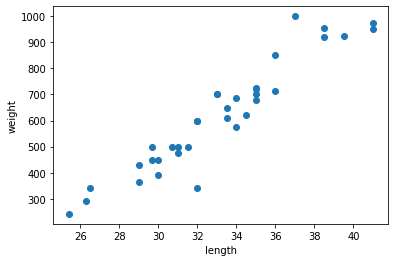

In [158]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 파이썬 시각화는 객체지향으로 한다.
  - 좀더 이쁘게 그리기위해

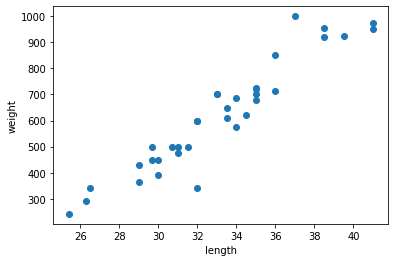

In [162]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 빙어 데이터 준비 

In [163]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

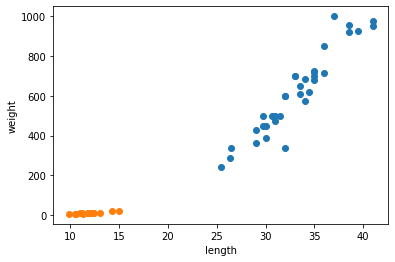

In [167]:
fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.scatter(smelt_length, smelt_weight)
ax.set_xlabel("length")
ax.set_ylabel("weight")
plt.show()

- 두개의 리스트 합치기

In [169]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

- 2차원 리스트로 만든다 

In [172]:
fish_data = [[l, w] for l,w in zip(length,weight)]
fish_data[0:5] # 2차원 리스트

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

- 라벨링 = 지도학습 

In [175]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 모델링

In [183]:
from sklearn.neighbors import KNeighborsClassifier

# 클래스의 인스턴스화
kn = KNeighborsClassifier()

# 모형 학습
kn.fit(fish_data, fish_target)



KNeighborsClassifier()

In [185]:
# 예측 정확도
kn.score(fish_data, fish_target)

1.0

- 실제 예측 해보기 
  - 길이 : 30, 몸무게 : 600

In [189]:
ac_length = int(input("길이입력"))
ac_weight = int(input("무게입력"))

preds = int(kn.predict([[ac_length,ac_weight]]))
#print(preds)
if preds ==1:
  print("도미")
else:
  print("빙어")

길이입력500
무게입력600
도미
